# Regresión lineal : Costo de un incidente de seguridad.

En este esjercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

EL ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

# 1.- Generación del DataSet

In [1]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random. randn(100, 1)

print("La longitud del DataSet es: ", len(X))




















































































La longitud del DataSet es:  100


# 2.- Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

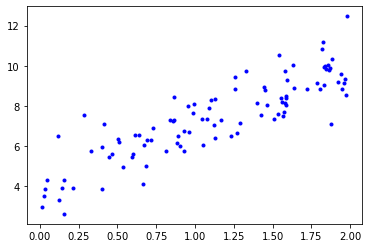

In [3]:
plt.plot(X, y, "b.")
plt.show()

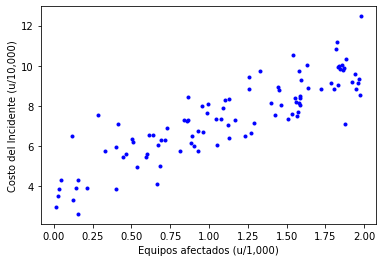

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del Incidente (u/10,000)")
plt.show()

# 3.- Modificación del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.044252,4.294572
1,1.719278,8.831677
2,0.928475,6.773835
3,1.923531,9.208570
4,0.990208,7.636194
5,1.637141,8.879284
6,1.824263,11.181751
7,0.144813,3.925214
8,1.131380,8.328041
9,0.668496,4.116601


In [7]:
#  Escalado del Número de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
#Escalado del Costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,44,42945
1,1719,88316
2,928,67738
3,1923,92085
4,990,76361
5,1637,88792
6,1824,111817
7,144,39252
8,1131,83280
9,668,41166


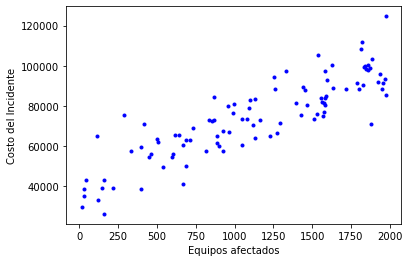

In [8]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 4.- Construcción del Modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construcción del modelo y ajuste de la función de hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [11]:
# Parámetro Tetha 0
lin_reg.intercept_

41018.849272277555

In [12]:
# Parámetro Tetha 1
lin_reg.coef_

array([29.4386751])

In [13]:
# Predicción para el valor minimo y maxico para el conjunto de datos de entrenamiento
X_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

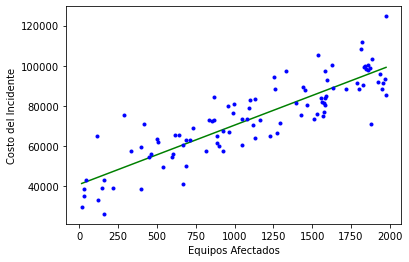

In [14]:
# Representación gráfica de la función de hipótesis generada.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

# 5.- Predicción de nuevos ejemplos

In [15]:
x_new = np.array([[1300]]) # Número de equipos afectados.
# Predicción del costo que tendría el incidente.
Costo = lin_reg.predict(x_new)
print("EL costo del incidente sería: $", int(Costo[0]))

EL costo del incidente sería: $ 79289


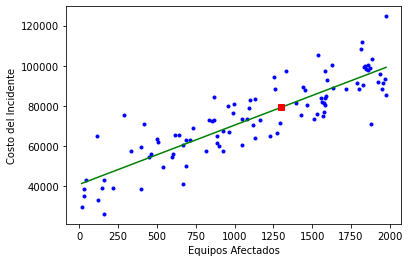

In [16]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rs")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()